   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

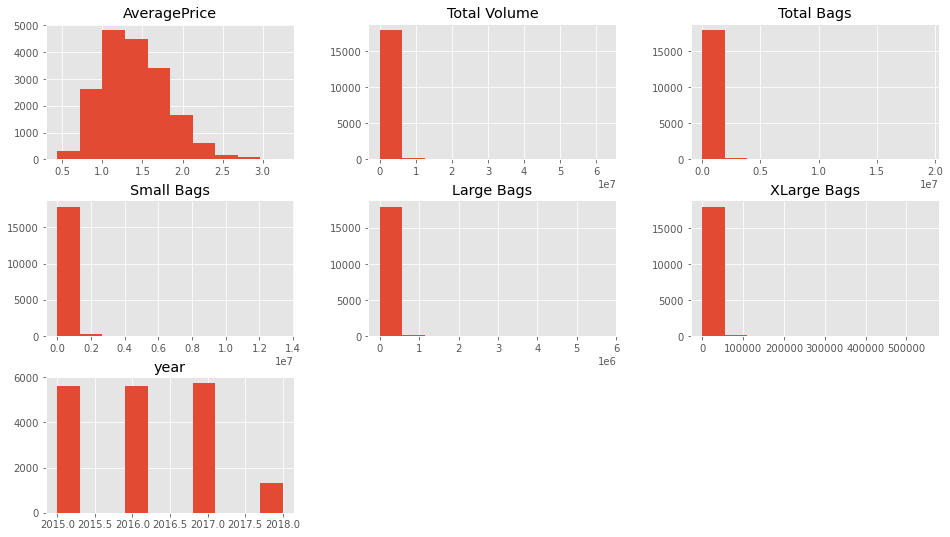

(18249, 3)


/var/folders/hx/2jlg0sy9463fcfyt9v9tpq680000gn/T/ipykernel_37627/3348512270.py:47: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


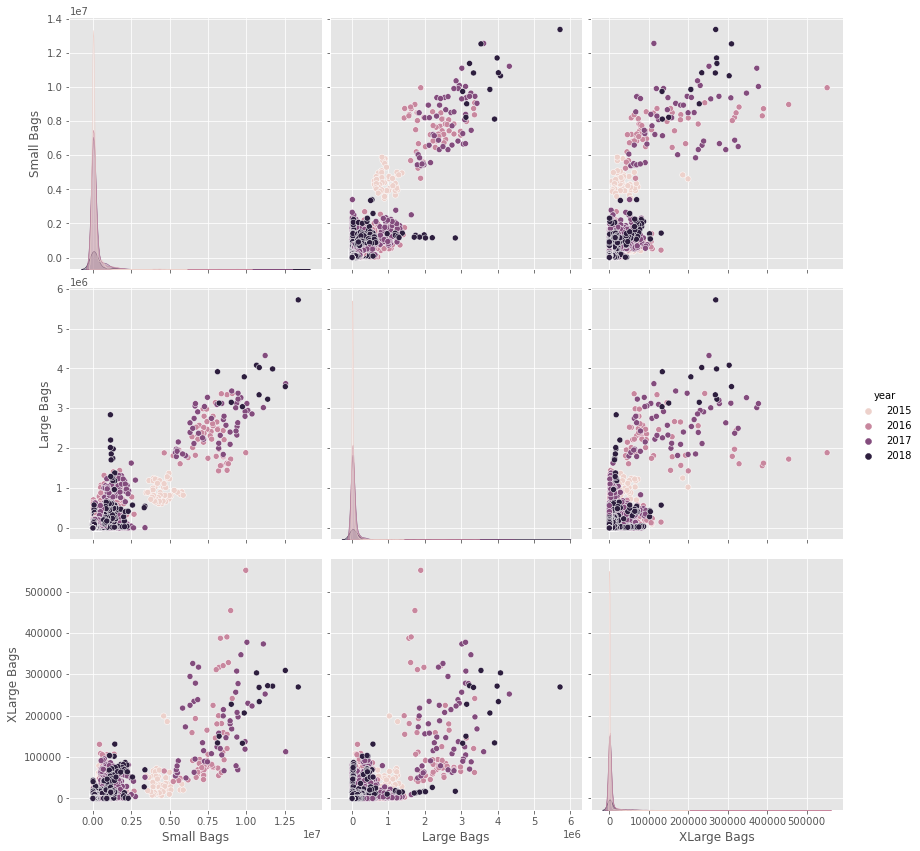

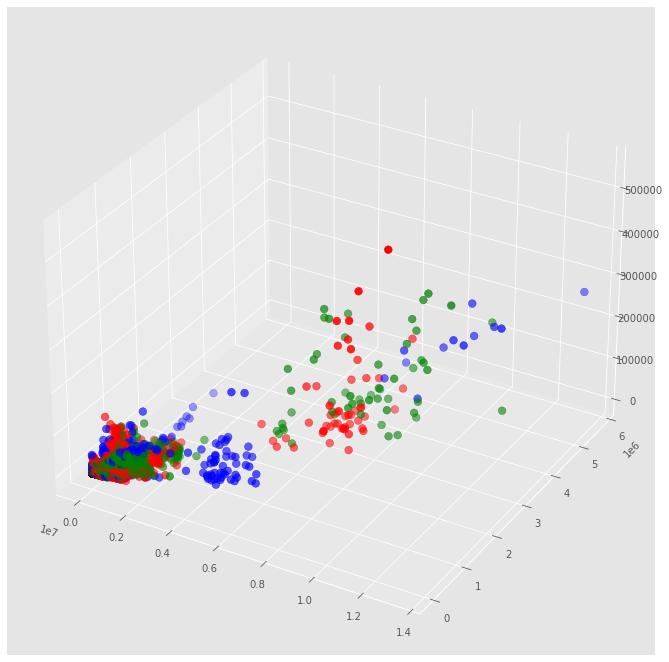

In [2]:
# Importando librerias que permitiran ejecutar el algoritmo y graficar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Carga de datos
data = pd.read_csv("../avocado.csv")

# Eliminando variabes que no sirven 
print(data.head())
data = data.drop(data.columns[[0, 4, 5, 6]], axis='columns')
print(data)

# Visualizand primeros elementos
print(data.head())

# Visualizando información estadística
print(data.describe())

# Registros de total de bolsas por año
print(data.groupby('year').size())

# Visualización de datos de dispersión
data.hist()
plt.show()

# Cruzando variables para obtención de pista de agrupacion con relacion a sus años
sb.pairplot(data.dropna(), hue='year',height=4,
            vars=["Small Bags","Large Bags", "XLarge Bags"],
            kind='scatter')

# Definición de entradas con variables para alimentar algoritmo
X = np.array(data[["Small Bags","Large Bags", "XLarge Bags"]])
y = np.array(data['year'])
print(X.shape)

# Gráfica 3D
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

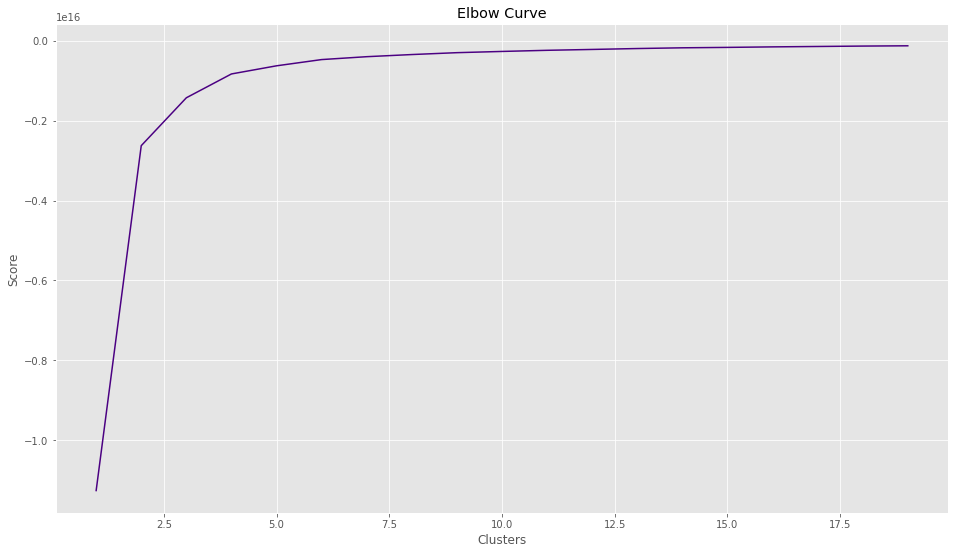

[[6.14708475e+04 1.99462675e+04 8.69700393e+02]
 [7.71829243e+06 2.36568410e+06 1.50320373e+05]
 [1.21702265e+06 3.27200939e+05 2.12671056e+04]]


/var/folders/hx/2jlg0sy9463fcfyt9v9tpq680000gn/T/ipykernel_37627/2516872325.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


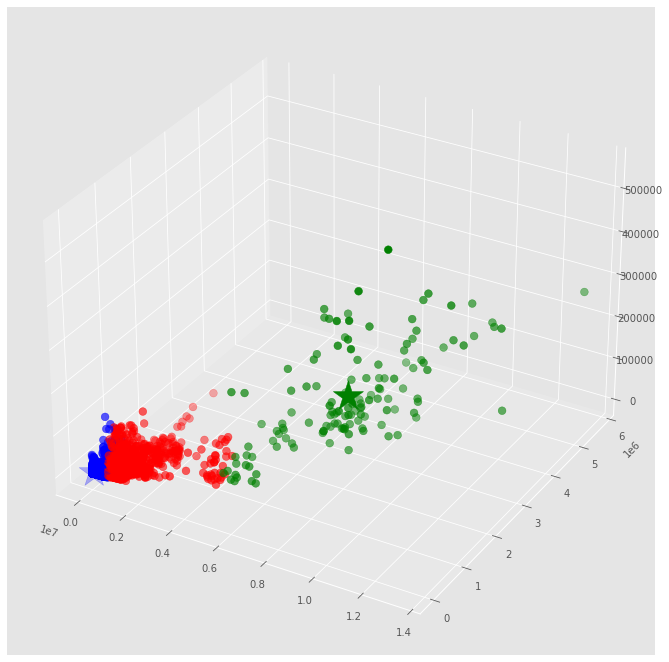

In [3]:
# Obteniendo el valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, color='indigo')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Ejecutando K-Means para 3 clusters
kmeans = KMeans(n_clusters=3).fit(X)

# Obteniendo etiquetas y centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Grafica 3D - estrellas marcan el centro
# Prediccion de clusters
labels = kmeans.predict(X)
# Obteniendo los centros de los clusters
C = kmeans.cluster_centers_
colores=['blue','green','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
